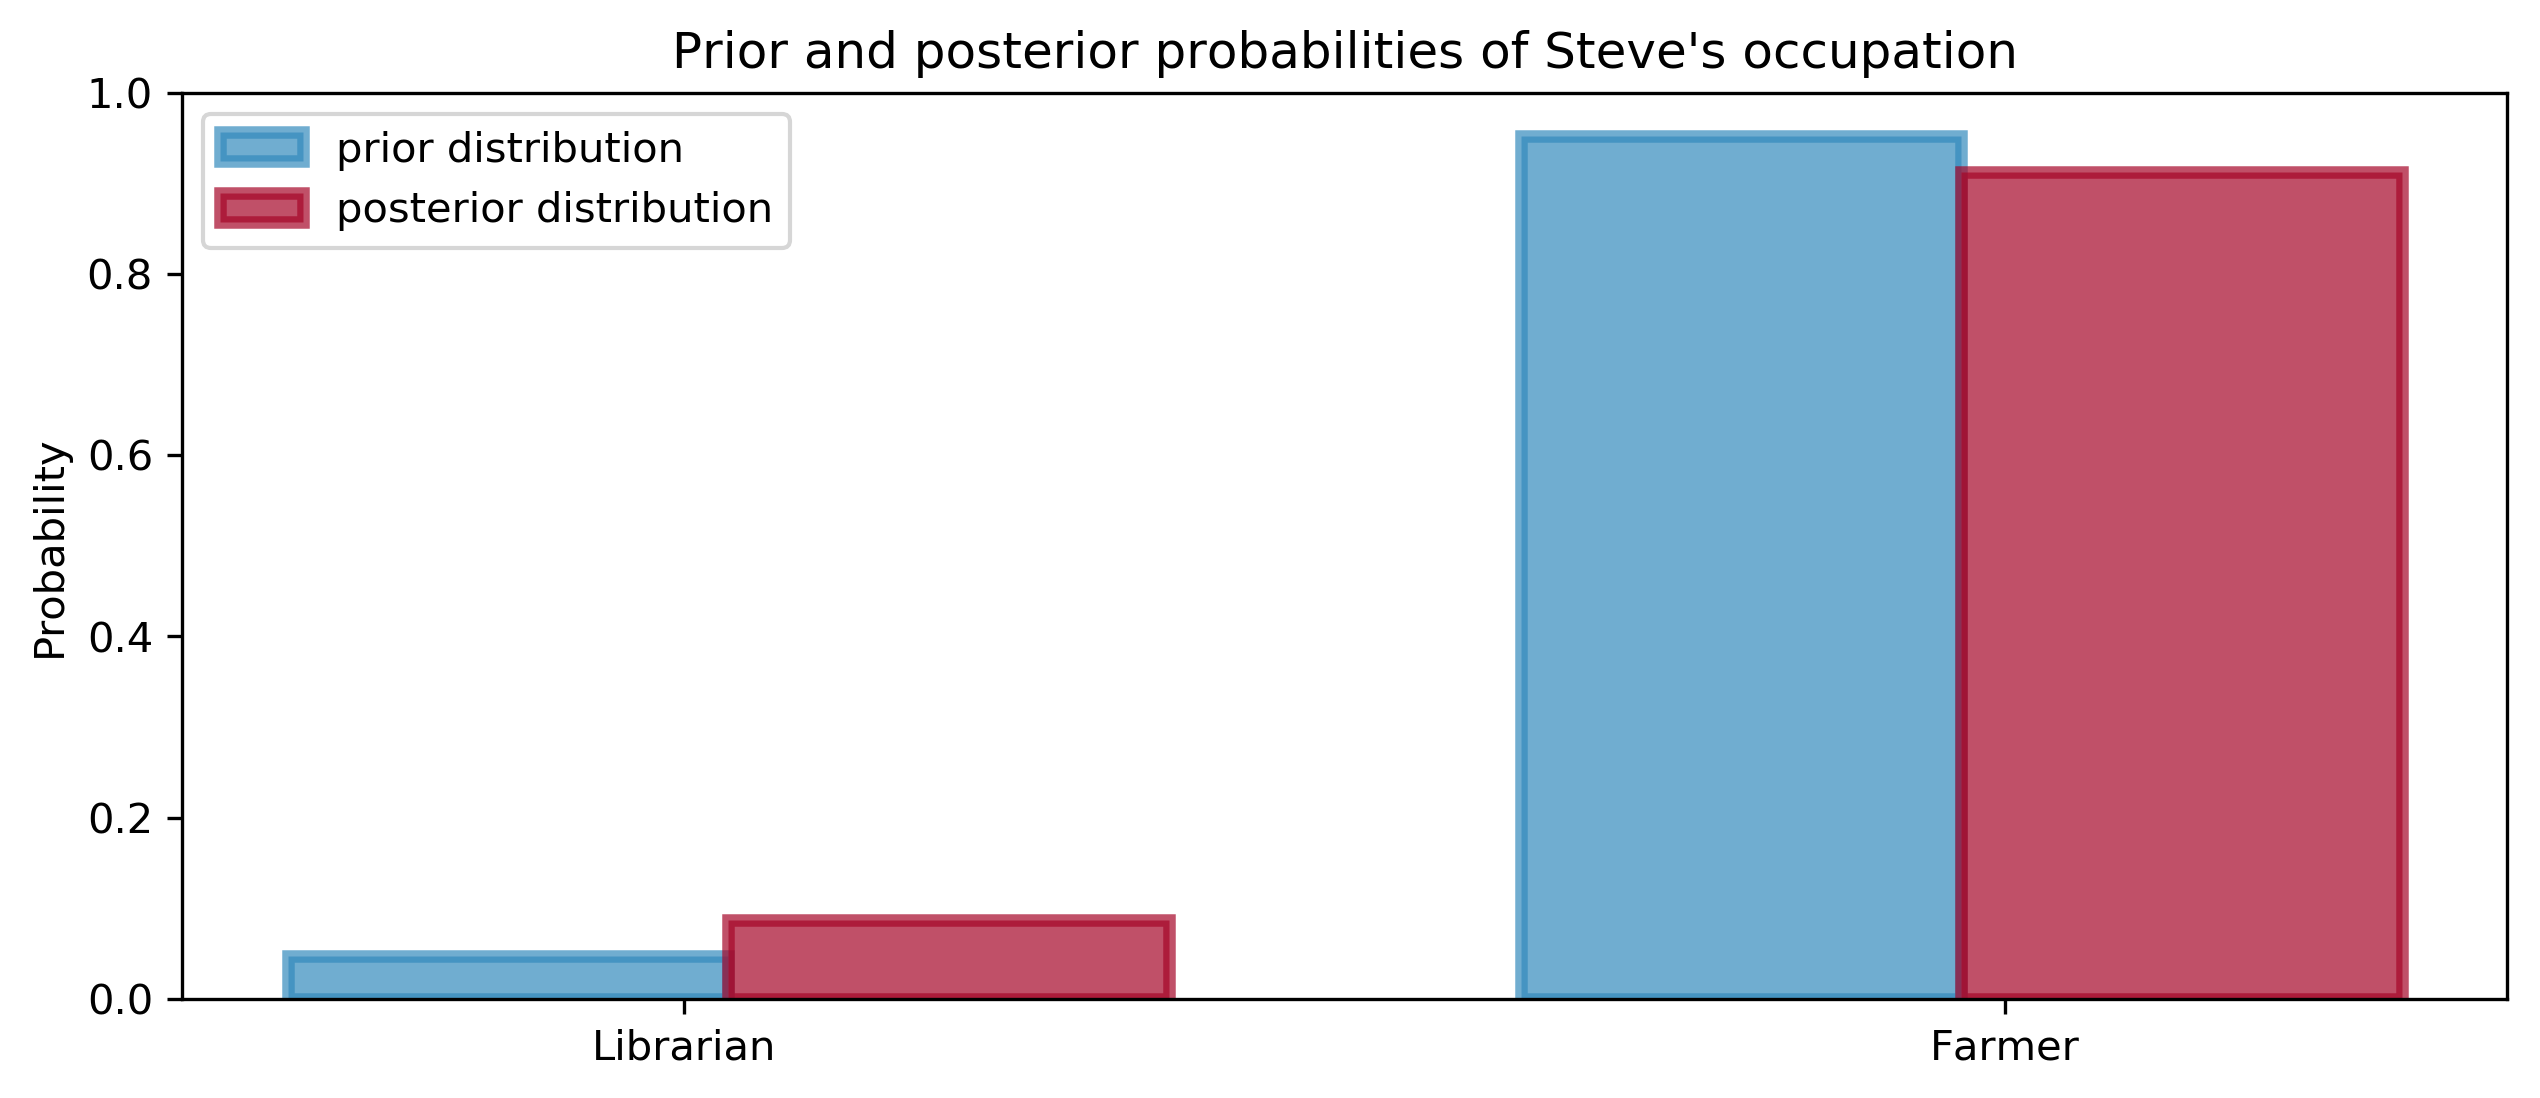

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

# 画布大小
figsize(10, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD', '#A60628']
prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]
# 柱状图 bar，散点图 scatter.lw不懂
plt.bar ([0, .7], prior, alpha=0.70, width=0.25, color=colors[0], label="prior distribution", lw="3", edgecolor="#348ABD")
plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7, width=0.25, color=colors[1], label="posterior distribution", lw="3", edgecolor="#A60628")

# x轴限制
plt.xticks([0.10, 0.85], ["Librarian", "Farmer"])
plt.title("Prior and posterior probabilities of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="best")

Text(0.5,1,'Probability mass function of a Poisson random variable, differing \\$\\lambda$ values')

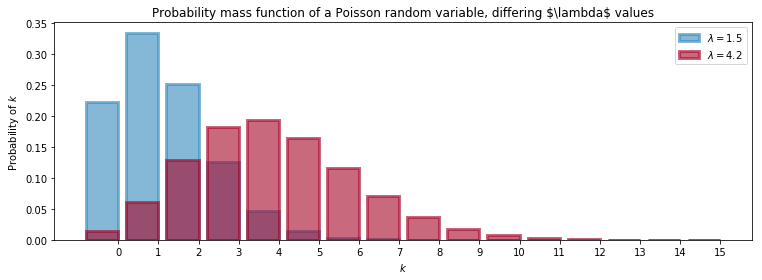

In [2]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ['#348ABD', '#A60628']

plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0], label="$\lambda = %.1f$" % lambda_[0], alpha=0.60, edgecolor=colors[0], lw="3")
plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1], label="$\lambda = %.1f$" % lambda_[1], alpha=0.60, edgecolor=colors[1], lw="3")

plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable, differing \$\lambda$ values")

Text(0.5,1,'Probability density function of an exponential random variable, differing $\\lambda$ values')

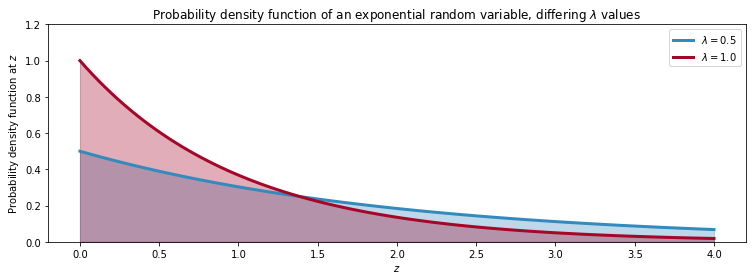

In [3]:
# 0-4分成100份
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    # pdf 显示概率密度函数
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3, color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel("Probability density function at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an exponential random variable, differing $\lambda$ values")

(0, 74)

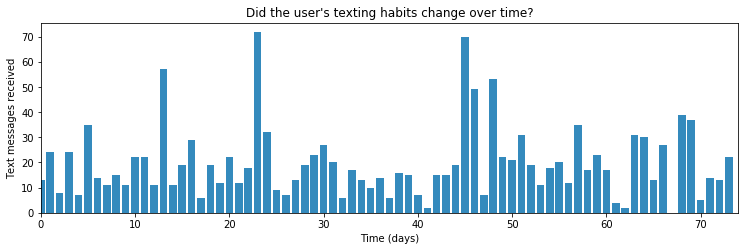

In [4]:
figsize(12.5, 3.5)
count_data = np.loadtxt("D:/Loca/book/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master/Chapter1_Introduction/data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("Text messages received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [8]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)